# Compare

In [1]:
import sys,os
import numpy as np
import pandas as pd
import pylab as py
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import rc
from matplotlib import cm
from matplotlib.colors import LogNorm
from matplotlib.font_manager import FontProperties
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text',usetex=True)
%matplotlib inline
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [2]:
font0=FontProperties()
font0.set_family('sans-serif')
font0.set_style('italic')
font0.set_variant('normal')

## Load

In [2]:
grid={}
grid['pion ff']=np.loadtxt("grid_pion_ff.dat", skiprows=0)
grid['pion gpd']=np.loadtxt("grid_pion_gpd.dat", skiprows=0)
grid['pion gpd 3D']=np.loadtxt("grid3d_pion_gpd.dat", skiprows=0)


grid['proton gpd Hu']=np.loadtxt("grid_proton_gpd_hu.dat", skiprows=0)
grid['proton gpd Hd']=np.loadtxt("grid_proton_gpd_hd.dat", skiprows=0)
grid['proton gpd Eu']=np.loadtxt("grid_proton_gpd_eu.dat", skiprows=0)
grid['proton gpd Ed']=np.loadtxt("grid_proton_gpd_ed.dat", skiprows=0)



## Pion

### Form factors

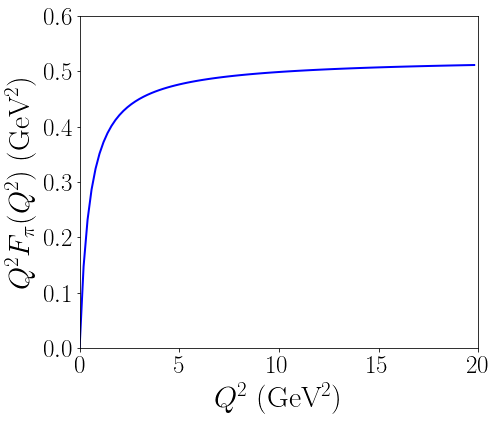

In [8]:
# form factor
nrows,ncols=1,1
py.figure(figsize=(ncols*7,nrows*7*0.85))

ax=py.subplot(nrows,ncols,1)
ax.plot(grid['pion ff'][:,0].T, grid['pion ff'][:,1].T, color='blue', ls='-', linewidth=2)
ax.set_xlabel(r'$Q^2~\rm(GeV^2)$',size=30)
ax.set_ylabel(r'$Q^2F_\pi(Q^2)~\rm(GeV^2)$',size=30)
ax.set_xlim(0,20)
ax.set_ylim(0,0.6)
#ax.set_xscale('log')
ax.tick_params(axis='both', which='major', labelsize=25)
#ax.set_xticks([0.0,0.2,0.4,0.6,0.8,1.0])
#ax.set_yticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
#ax.text(0.20,0.85,r'$\rm \mu^2=27\,GeV^2$',horizontalalignment='center',transform=ax.transAxes,size=20)
ax.legend(fontsize=15,frameon=False, loc='upper right')

py.tight_layout()
py.savefig('pion_ff.pdf')

### GPDs

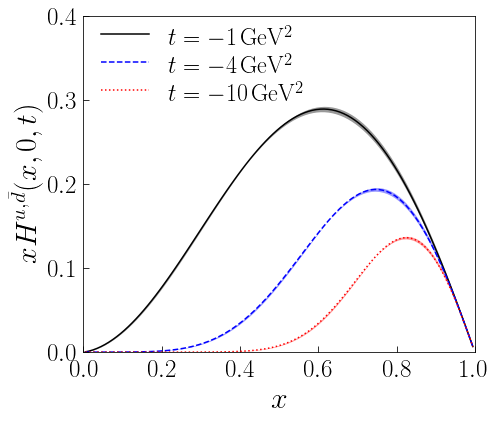

In [13]:
# gpd
# form factor
nrows,ncols=1,1
py.figure(figsize=(ncols*7,nrows*7*0.85))

ax=py.subplot(nrows,ncols,1)
ax.plot(grid['pion gpd'][:,0].T, grid['pion gpd'][:,1].T, color='black', ls='-', label=r'$t=-1\,\rm GeV^2$')
ax.fill_between(grid['pion gpd'][:,0].T, 
                grid['pion gpd'][:,1].T-((grid['pion gpd'][:,2].T-grid['pion gpd'][:,3].T)**2)**0.5/2,
                grid['pion gpd'][:,1].T+((grid['pion gpd'][:,2].T-grid['pion gpd'][:,3].T)**2)**0.5/2,
                linewidth=0, color='black', alpha=0.4)
ax.plot(grid['pion gpd'][:,0].T, grid['pion gpd'][:,4].T, color='blue', ls='--', label=r'$t=-4\,\rm GeV^2$')
ax.fill_between(grid['pion gpd'][:,0].T, 
                grid['pion gpd'][:,4].T-((grid['pion gpd'][:,5].T-grid['pion gpd'][:,6].T)**2)**0.5/2,
                grid['pion gpd'][:,4].T+((grid['pion gpd'][:,5].T-grid['pion gpd'][:,6].T)**2)**0.5/2,
                linewidth=0, color='blue', alpha=0.4)
ax.plot(grid['pion gpd'][:,0].T, grid['pion gpd'][:,7].T, color='red', ls=':', label=r'$t=-10\,\rm GeV^2$')
ax.fill_between(grid['pion gpd'][:,0].T, 
                grid['pion gpd'][:,7].T-((grid['pion gpd'][:,8].T-grid['pion gpd'][:,9].T)**2)**0.5/2,
                grid['pion gpd'][:,7].T+((grid['pion gpd'][:,8].T-grid['pion gpd'][:,9].T)**2)**0.5/2,
                linewidth=0, color='red', alpha=0.4)
ax.set_xlabel(r'$x$',size=30)
ax.set_ylabel(r'$xH^{u,\bar{d}}(x,0,t)$',size=30)
ax.set_xlim(0,1)
ax.set_ylim(0,0.4)
#ax.set_xscale('log')
ax.tick_params(axis='both', which='major', labelsize=25, direction='in', length=6, pad=7)
#ax.set_xticks([0.0,0.2,0.4,0.6,0.8,1.0])
#ax.set_yticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
#ax.text(0.20,0.85,r'$\rm \mu^2=27\,GeV^2$',horizontalalignment='center',transform=ax.transAxes,size=20)
ax.legend(fontsize=24,frameon=False, loc=(0.02,0.71), labelspacing=0.25)

py.tight_layout()
py.savefig('pion_gpd.pdf')

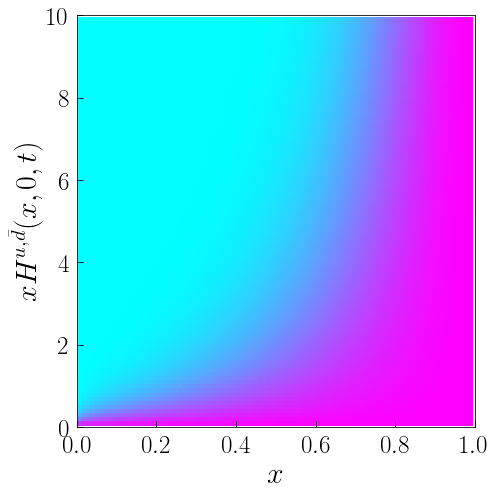

In [88]:
# gpd
# form factor
nrows,ncols=1,1
py.figure(figsize=(ncols*7,nrows*7))

ax=py.subplot(nrows,ncols,1)
#ax=fig.gca(projection='3d')
ax.pcolormesh(grid['pion gpd 3D'][:10000:100,0], grid['pion gpd 3D'][:100, 1], grid['pion gpd 3D'][:,2].reshape(100,100).T,\
        cmap='cool')
#setting
ax.set_xlabel(r'$x$',size=30)
ax.set_ylabel(r'$xH^{u,\bar{d}}(x,0,t)$',size=30)
ax.set_xlim(0,1)
ax.set_ylim(0,10)
ax.tick_params(axis='both', which='major', labelsize=25, direction='in', length=6, pad=7)
#ax.set_xticks([0.0,0.2,0.4,0.6,0.8,1.0])
#ax.set_yticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
#ax.text(0.20,0.85,r'$\rm \mu^2=27\,GeV^2$',horizontalalignment='center',transform=ax.transAxes,size=20)
ax.legend(fontsize=24,frameon=False, loc=(0.02,0.71), labelspacing=0.25)

py.tight_layout()
#py.savefig('pion_gpd_cont.pdf')

## Nucleon

### Form factors

### GPDs

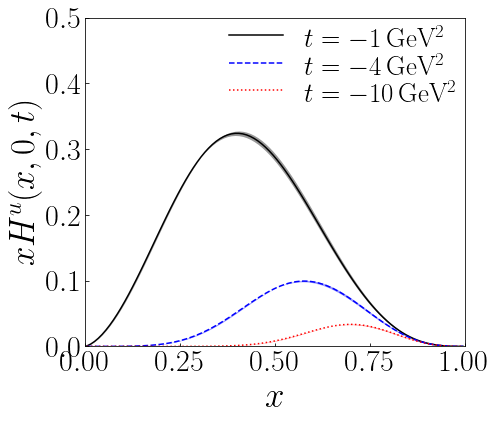

In [23]:
# gpd Hu
nrows,ncols=1,1
py.figure(figsize=(ncols*7,nrows*7*0.85))

ax=py.subplot(nrows,ncols,1)
ax.plot(grid['proton gpd Hu'][:,0].T, grid['proton gpd Hu'][:,1].T, color='black', ls='-', label=r'$t=-1\,\rm GeV^2$')
ax.fill_between(grid['proton gpd Hu'][:,0].T, 
                grid['proton gpd Hu'][:,1].T-((grid['proton gpd Hu'][:,2].T-grid['proton gpd Hu'][:,3].T)**2)**0.5/2,
                grid['proton gpd Hu'][:,1].T+((grid['proton gpd Hu'][:,2].T-grid['proton gpd Hu'][:,3].T)**2)**0.5/2,
                linewidth=0, color='black', alpha=0.4)
ax.plot(grid['proton gpd Hu'][:,0].T, grid['proton gpd Hu'][:,4].T, color='blue', ls='--', label=r'$t=-4\,\rm GeV^2$')
ax.fill_between(grid['proton gpd Hu'][:,0].T, 
                grid['proton gpd Hu'][:,4].T-((grid['proton gpd Hu'][:,5].T-grid['proton gpd Hu'][:,6].T)**2)**0.5/2,
                grid['proton gpd Hu'][:,4].T+((grid['proton gpd Hu'][:,5].T-grid['proton gpd Hu'][:,6].T)**2)**0.5/2,
                linewidth=0, color='blue', alpha=0.4)
ax.plot(grid['proton gpd Hu'][:,0].T, grid['proton gpd Hu'][:,7].T, color='red', ls=':', label=r'$t=-10\,\rm GeV^2$')
ax.fill_between(grid['proton gpd Hu'][:,0].T, 
                grid['proton gpd Hu'][:,7].T-((grid['proton gpd Hu'][:,8].T-grid['proton gpd Hu'][:,9].T)**2)**0.5/2,
                grid['proton gpd Hu'][:,7].T+((grid['proton gpd Hu'][:,8].T-grid['proton gpd Hu'][:,9].T)**2)**0.5/2,
                linewidth=0, color='red', alpha=0.4)
ax.set_xlabel(r'$x$',size=35)
ax.set_ylabel(r'$xH^u(x,0,t)$',size=35)
ax.set_xlim(0,1)
ax.set_ylim(0,0.5)
#ax.set_xscale('log')
ax.tick_params(axis='both', which='major', labelsize=30, direction='in')
#ax.set_xticks([0.0,0.2,0.4,0.6,0.8,1.0])
#ax.set_yticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
#ax.text(0.20,0.85,r'$\rm \mu^2=27\,GeV^2$',horizontalalignment='center',transform=ax.transAxes,size=20)
ax.legend(fontsize=27,frameon=False, loc=(0.35,0.7), labelspacing=0.1)

py.tight_layout()
py.savefig('proton_gpd_hu.pdf')

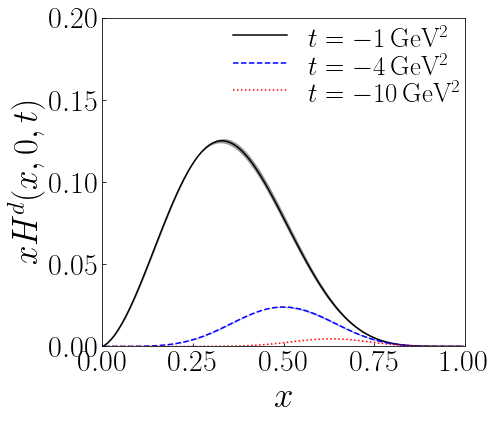

In [24]:
# gpd Hd
nrows,ncols=1,1
py.figure(figsize=(ncols*7,nrows*7*0.85))

ax=py.subplot(nrows,ncols,1)
ax.plot(grid['proton gpd Hd'][:,0].T, grid['proton gpd Hd'][:,1].T, color='black', ls='-', label=r'$t=-1\,\rm GeV^2$')
ax.fill_between(grid['proton gpd Hd'][:,0].T, 
                grid['proton gpd Hd'][:,1].T-((grid['proton gpd Hd'][:,2].T-grid['proton gpd Hd'][:,3].T)**2)**0.5/2,
                grid['proton gpd Hd'][:,1].T+((grid['proton gpd Hd'][:,2].T-grid['proton gpd Hd'][:,3].T)**2)**0.5/2,
                linewidth=0, color='black', alpha=0.4)
ax.plot(grid['proton gpd Hd'][:,0].T, grid['proton gpd Hd'][:,4].T, color='blue', ls='--', label=r'$t=-4\,\rm GeV^2$')
ax.fill_between(grid['proton gpd Hd'][:,0].T, 
                grid['proton gpd Hd'][:,4].T-((grid['proton gpd Hd'][:,5].T-grid['proton gpd Hd'][:,6].T)**2)**0.5/2,
                grid['proton gpd Hd'][:,4].T+((grid['proton gpd Hd'][:,5].T-grid['proton gpd Hd'][:,6].T)**2)**0.5/2,
                linewidth=0, color='blue', alpha=0.4)
ax.plot(grid['proton gpd Hd'][:,0].T, grid['proton gpd Hd'][:,7].T, color='red', ls=':', label=r'$t=-10\,\rm GeV^2$')
ax.fill_between(grid['proton gpd Hd'][:,0].T, 
                grid['proton gpd Hd'][:,7].T-((grid['proton gpd Hd'][:,8].T-grid['proton gpd Hd'][:,9].T)**2)**0.5/2,
                grid['proton gpd Hd'][:,7].T+((grid['proton gpd Hd'][:,8].T-grid['proton gpd Hd'][:,9].T)**2)**0.5/2,
                linewidth=0, color='red', alpha=0.4)
ax.set_xlabel(r'$x$',size=35)
ax.set_ylabel(r'$xH^d(x,0,t)$',size=35)
ax.set_xlim(0,1)
ax.set_ylim(0,0.2)
#ax.set_xscale('log')
ax.tick_params(axis='both', which='major', labelsize=30, direction='in')
#ax.set_xticks([0.0,0.2,0.4,0.6,0.8,1.0])
#ax.set_yticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
#ax.text(0.20,0.85,r'$\rm \mu^2=27\,GeV^2$',horizontalalignment='center',transform=ax.transAxes,size=20)
ax.legend(fontsize=27,frameon=False, loc=(0.33,0.7), labelspacing=0.1)

py.tight_layout()
py.savefig('proton_gpd_hd.pdf')

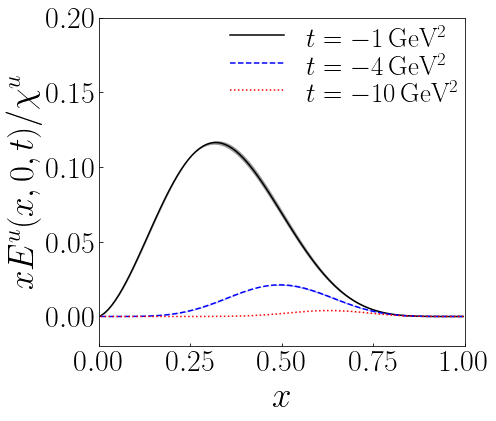

In [25]:
# gpd Eu
nrows,ncols=1,1
py.figure(figsize=(ncols*7,nrows*7*0.85))

ax=py.subplot(nrows,ncols,1)
ax.plot(grid['proton gpd Eu'][:,0].T, grid['proton gpd Eu'][:,1].T, color='black', ls='-', label=r'$t=-1\,\rm GeV^2$')
ax.fill_between(grid['proton gpd Eu'][:,0].T, 
                grid['proton gpd Eu'][:,1].T-((grid['proton gpd Eu'][:,2].T-grid['proton gpd Eu'][:,3].T)**2)**0.5/2,
                grid['proton gpd Eu'][:,1].T+((grid['proton gpd Eu'][:,2].T-grid['proton gpd Eu'][:,3].T)**2)**0.5/2,
                linewidth=0, color='black', alpha=0.4)
ax.plot(grid['proton gpd Eu'][:,0].T, grid['proton gpd Eu'][:,4].T, color='blue', ls='--', label=r'$t=-4\,\rm GeV^2$')
ax.fill_between(grid['proton gpd Eu'][:,0].T, 
                grid['proton gpd Eu'][:,4].T-((grid['proton gpd Eu'][:,5].T-grid['proton gpd Eu'][:,6].T)**2)**0.5/2,
                grid['proton gpd Eu'][:,4].T+((grid['proton gpd Eu'][:,5].T-grid['proton gpd Eu'][:,6].T)**2)**0.5/2,
                linewidth=0, color='blue', alpha=0.4)
ax.plot(grid['proton gpd Eu'][:,0].T, grid['proton gpd Eu'][:,7].T, color='red', ls=':', label=r'$t=-10\,\rm GeV^2$')
ax.fill_between(grid['proton gpd Eu'][:,0].T, 
                grid['proton gpd Eu'][:,7].T-((grid['proton gpd Eu'][:,8].T-grid['proton gpd Eu'][:,9].T)**2)**0.5/2,
                grid['proton gpd Eu'][:,7].T+((grid['proton gpd Eu'][:,8].T-grid['proton gpd Eu'][:,9].T)**2)**0.5/2,
                linewidth=0, color='red', alpha=0.4)
ax.set_xlabel(r'$x$',size=35)
ax.set_ylabel(r'$xE^u(x,0,t)/\chi^u$',size=35)
ax.set_xlim(0,1)
ax.set_ylim(-0.02,0.2)
#ax.set_xscale('log')
ax.tick_params(axis='both', which='major', labelsize=30, direction='in')
#ax.set_xticks([0.0,0.2,0.4,0.6,0.8,1.0])
#ax.set_yticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
#ax.text(0.20,0.85,r'$\rm \mu^2=27\,GeV^2$',horizontalalignment='center',transform=ax.transAxes,size=20)
ax.legend(fontsize=27,frameon=False, loc=(0.33,0.7), labelspacing=0.1)

py.tight_layout()
py.savefig('proton_gpd_eu.pdf')

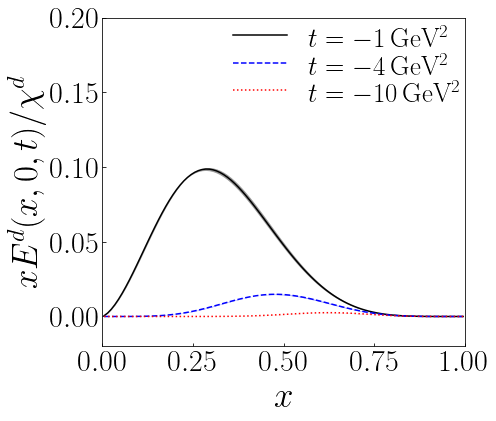

In [26]:
# gpd Ed
nrows,ncols=1,1
py.figure(figsize=(ncols*7,nrows*7*0.85))

ax=py.subplot(nrows,ncols,1)
ax.plot(grid['proton gpd Ed'][:,0].T, grid['proton gpd Ed'][:,1].T, color='black', ls='-', label=r'$t=-1\,\rm GeV^2$')
ax.fill_between(grid['proton gpd Ed'][:,0].T, 
                grid['proton gpd Ed'][:,1].T-((grid['proton gpd Ed'][:,2].T-grid['proton gpd Ed'][:,3].T)**2)**0.5/2,
                grid['proton gpd Ed'][:,1].T+((grid['proton gpd Ed'][:,2].T-grid['proton gpd Ed'][:,3].T)**2)**0.5/2,
                linewidth=0, color='black', alpha=0.4)
ax.plot(grid['proton gpd Ed'][:,0].T, grid['proton gpd Ed'][:,4].T, color='blue', ls='--', label=r'$t=-4\,\rm GeV^2$')
ax.fill_between(grid['proton gpd Ed'][:,0].T, 
                grid['proton gpd Ed'][:,4].T-((grid['proton gpd Ed'][:,5].T-grid['proton gpd Ed'][:,6].T)**2)**0.5/2,
                grid['proton gpd Ed'][:,4].T+((grid['proton gpd Ed'][:,5].T-grid['proton gpd Ed'][:,6].T)**2)**0.5/2,
                linewidth=0, color='blue', alpha=0.4)
ax.plot(grid['proton gpd Ed'][:,0].T, grid['proton gpd Ed'][:,7].T, color='red', ls=':', label=r'$t=-10\,\rm GeV^2$')
ax.fill_between(grid['proton gpd Ed'][:,0].T, 
                grid['proton gpd Ed'][:,7].T-((grid['proton gpd Ed'][:,8].T-grid['proton gpd Ed'][:,9].T)**2)**0.5/2,
                grid['proton gpd Ed'][:,7].T+((grid['proton gpd Ed'][:,8].T-grid['proton gpd Ed'][:,9].T)**2)**0.5/2,
                linewidth=0, color='red', alpha=0.4)
ax.set_xlabel(r'$x$',size=35)
ax.set_ylabel(r'$xE^d(x,0,t)/\chi^d$',size=35)
ax.set_xlim(0,1)
ax.set_ylim(-0.02,0.2)
#ax.set_xscale('log')
ax.tick_params(axis='both', which='major', labelsize=30, direction='in')
#ax.set_xticks([0.0,0.2,0.4,0.6,0.8,1.0])
#ax.set_yticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
#ax.text(0.20,0.85,r'$\rm \mu^2=27\,GeV^2$',horizontalalignment='center',transform=ax.transAxes,size=20)
ax.legend(fontsize=27,frameon=False, loc=(0.33,0.7), labelspacing=0.1)

py.tight_layout()
py.savefig('proton_gpd_ed.pdf')

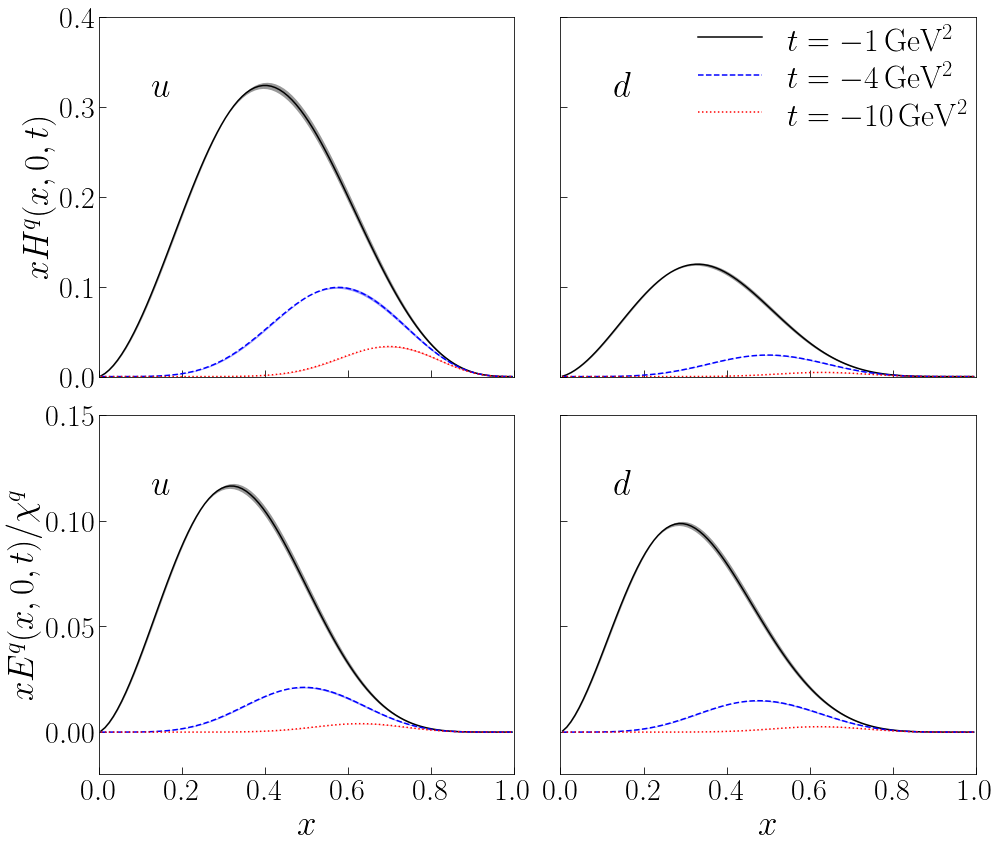

In [3]:
nrows,ncols=2,2
py.figure(figsize=(ncols*7,nrows*7*0.85))

ax=py.subplot(nrows,ncols,1)
ax.plot(grid['proton gpd Hu'][:,0].T, grid['proton gpd Hu'][:,1].T, color='black', ls='-', label=r'$t=-1\,\rm GeV^2$')
ax.fill_between(grid['proton gpd Hu'][:,0].T, 
                grid['proton gpd Hu'][:,1].T-((grid['proton gpd Hu'][:,2].T-grid['proton gpd Hu'][:,3].T)**2)**0.5/2,
                grid['proton gpd Hu'][:,1].T+((grid['proton gpd Hu'][:,2].T-grid['proton gpd Hu'][:,3].T)**2)**0.5/2,
                linewidth=0, color='black', alpha=0.4)
ax.plot(grid['proton gpd Hu'][:,0].T, grid['proton gpd Hu'][:,4].T, color='blue', ls='--', label=r'$t=-4\,\rm GeV^2$')
ax.fill_between(grid['proton gpd Hu'][:,0].T, 
                grid['proton gpd Hu'][:,4].T-((grid['proton gpd Hu'][:,5].T-grid['proton gpd Hu'][:,6].T)**2)**0.5/2,
                grid['proton gpd Hu'][:,4].T+((grid['proton gpd Hu'][:,5].T-grid['proton gpd Hu'][:,6].T)**2)**0.5/2,
                linewidth=0, color='blue', alpha=0.4)
ax.plot(grid['proton gpd Hu'][:,0].T, grid['proton gpd Hu'][:,7].T, color='red', ls=':', label=r'$t=-10\,\rm GeV^2$')
ax.fill_between(grid['proton gpd Hu'][:,0].T, 
                grid['proton gpd Hu'][:,7].T-((grid['proton gpd Hu'][:,8].T-grid['proton gpd Hu'][:,9].T)**2)**0.5/2,
                grid['proton gpd Hu'][:,7].T+((grid['proton gpd Hu'][:,8].T-grid['proton gpd Hu'][:,9].T)**2)**0.5/2,
                linewidth=0, color='red', alpha=0.4)
#ax.set_xlabel(r'$x$',size=35)
ax.set_ylabel(r'$xH^q(x,0,t)$',size=35)
ax.set_xlim(0,1)
ax.set_ylim(0,0.4)
#ax.set_xscale('log')
ax.tick_params(axis='both', which='major', labelsize=30, direction='in', length=7)
ax.set_xticklabels([])
ax.set_xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
#ax.set_yticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
ax.text(0.15,0.78,r'$u$',horizontalalignment='center',transform=ax.transAxes,size=35)
#ax.legend(fontsize=27,frameon=False, loc=(0.35,0.7), labelspacing=0.1)

ax=py.subplot(nrows,ncols,2)
ax.plot(grid['proton gpd Hd'][:,0].T, grid['proton gpd Hd'][:,1].T, color='black', ls='-', label=r'$t=-1\,\rm GeV^2$')
ax.fill_between(grid['proton gpd Hd'][:,0].T, 
                grid['proton gpd Hd'][:,1].T-((grid['proton gpd Hd'][:,2].T-grid['proton gpd Hd'][:,3].T)**2)**0.5/2,
                grid['proton gpd Hd'][:,1].T+((grid['proton gpd Hd'][:,2].T-grid['proton gpd Hd'][:,3].T)**2)**0.5/2,
                linewidth=0, color='black', alpha=0.4)
ax.plot(grid['proton gpd Hd'][:,0].T, grid['proton gpd Hd'][:,4].T, color='blue', ls='--', label=r'$t=-4\,\rm GeV^2$')
ax.fill_between(grid['proton gpd Hd'][:,0].T, 
                grid['proton gpd Hd'][:,4].T-((grid['proton gpd Hd'][:,5].T-grid['proton gpd Hd'][:,6].T)**2)**0.5/2,
                grid['proton gpd Hd'][:,4].T+((grid['proton gpd Hd'][:,5].T-grid['proton gpd Hd'][:,6].T)**2)**0.5/2,
                linewidth=0, color='blue', alpha=0.4)
ax.plot(grid['proton gpd Hd'][:,0].T, grid['proton gpd Hd'][:,7].T, color='red', ls=':', label=r'$t=-10\,\rm GeV^2$')
ax.fill_between(grid['proton gpd Hd'][:,0].T, 
                grid['proton gpd Hd'][:,7].T-((grid['proton gpd Hd'][:,8].T-grid['proton gpd Hd'][:,9].T)**2)**0.5/2,
                grid['proton gpd Hd'][:,7].T+((grid['proton gpd Hd'][:,8].T-grid['proton gpd Hd'][:,9].T)**2)**0.5/2,
                linewidth=0, color='red', alpha=0.4)
#ax.set_xlabel(r'$x$',size=35)
#ax.set_ylabel(r'$xH^d(x,0,t)$',size=35)
ax.set_xlim(0,1)
ax.set_ylim(0,0.4)
#ax.set_xscale('log')
ax.tick_params(axis='both', which='major', labelsize=30, direction='in', length=7)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_xticks([0.0,0.2,0.4,0.6,0.8])
#ax.set_yticks([])
ax.text(0.15,0.78,r'$d$',horizontalalignment='center',transform=ax.transAxes,size=35)
ax.legend(fontsize=32,frameon=False, loc=(0.3,0.65), labelspacing=0.25)

ax=py.subplot(nrows,ncols,3)
ax.plot(grid['proton gpd Eu'][:,0].T, grid['proton gpd Eu'][:,1].T, color='black', ls='-', label=r'$t=-1\,\rm GeV^2$')
ax.fill_between(grid['proton gpd Eu'][:,0].T, 
                grid['proton gpd Eu'][:,1].T-((grid['proton gpd Eu'][:,2].T-grid['proton gpd Eu'][:,3].T)**2)**0.5/2,
                grid['proton gpd Eu'][:,1].T+((grid['proton gpd Eu'][:,2].T-grid['proton gpd Eu'][:,3].T)**2)**0.5/2,
                linewidth=0, color='black', alpha=0.4)
ax.plot(grid['proton gpd Eu'][:,0].T, grid['proton gpd Eu'][:,4].T, color='blue', ls='--', label=r'$t=-4\,\rm GeV^2$')
ax.fill_between(grid['proton gpd Eu'][:,0].T, 
                grid['proton gpd Eu'][:,4].T-((grid['proton gpd Eu'][:,5].T-grid['proton gpd Eu'][:,6].T)**2)**0.5/2,
                grid['proton gpd Eu'][:,4].T+((grid['proton gpd Eu'][:,5].T-grid['proton gpd Eu'][:,6].T)**2)**0.5/2,
                linewidth=0, color='blue', alpha=0.4)
ax.plot(grid['proton gpd Eu'][:,0].T, grid['proton gpd Eu'][:,7].T, color='red', ls=':', label=r'$t=-10\,\rm GeV^2$')
ax.fill_between(grid['proton gpd Eu'][:,0].T, 
                grid['proton gpd Eu'][:,7].T-((grid['proton gpd Eu'][:,8].T-grid['proton gpd Eu'][:,9].T)**2)**0.5/2,
                grid['proton gpd Eu'][:,7].T+((grid['proton gpd Eu'][:,8].T-grid['proton gpd Eu'][:,9].T)**2)**0.5/2,
                linewidth=0, color='red', alpha=0.4)
ax.set_xlabel(r'$x$',size=35)
ax.set_ylabel(r'$xE^q(x,0,t)/\chi^q$',size=35)
ax.set_xlim(0,1)
ax.set_ylim(-0.02,0.15)
#ax.set_xscale('log')
ax.tick_params(axis='both', which='major', labelsize=30, direction='in', length=7)
ax.set_xticks([0.0,0.2,0.4,0.6,0.8,1.0])
#ax.set_yticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
ax.text(0.15,0.78,r'$u$',horizontalalignment='center',transform=ax.transAxes,size=35)
#ax.legend(fontsize=27,frameon=False, loc=(0.33,0.7), labelspacing=0.1)

ax=py.subplot(nrows,ncols,4)
ax.plot(grid['proton gpd Ed'][:,0].T, grid['proton gpd Ed'][:,1].T, color='black', ls='-', label=r'$t=-1\,\rm GeV^2$')
ax.fill_between(grid['proton gpd Ed'][:,0].T, 
                grid['proton gpd Ed'][:,1].T-((grid['proton gpd Ed'][:,2].T-grid['proton gpd Ed'][:,3].T)**2)**0.5/2,
                grid['proton gpd Ed'][:,1].T+((grid['proton gpd Ed'][:,2].T-grid['proton gpd Ed'][:,3].T)**2)**0.5/2,
                linewidth=0, color='black', alpha=0.4)
ax.plot(grid['proton gpd Ed'][:,0].T, grid['proton gpd Ed'][:,4].T, color='blue', ls='--', label=r'$t=-4\,\rm GeV^2$')
ax.fill_between(grid['proton gpd Ed'][:,0].T, 
                grid['proton gpd Ed'][:,4].T-((grid['proton gpd Ed'][:,5].T-grid['proton gpd Ed'][:,6].T)**2)**0.5/2,
                grid['proton gpd Ed'][:,4].T+((grid['proton gpd Ed'][:,5].T-grid['proton gpd Ed'][:,6].T)**2)**0.5/2,
                linewidth=0, color='blue', alpha=0.4)
ax.plot(grid['proton gpd Ed'][:,0].T, grid['proton gpd Ed'][:,7].T, color='red', ls=':', label=r'$t=-10\,\rm GeV^2$')
ax.fill_between(grid['proton gpd Ed'][:,0].T, 
                grid['proton gpd Ed'][:,7].T-((grid['proton gpd Ed'][:,8].T-grid['proton gpd Ed'][:,9].T)**2)**0.5/2,
                grid['proton gpd Ed'][:,7].T+((grid['proton gpd Ed'][:,8].T-grid['proton gpd Ed'][:,9].T)**2)**0.5/2,
                linewidth=0, color='red', alpha=0.4)
ax.set_xlabel(r'$x$',size=35)
#ax.set_ylabel(r'$xE^d(x,0,t)/\chi^d$',size=35)
ax.set_xlim(0,1)
ax.set_ylim(-0.02,0.15)
#ax.set_xscale('log')
ax.tick_params(axis='both', which='major', labelsize=30, direction='in', length=7)
ax.set_yticklabels([])
ax.set_xticks([0.0,0.2,0.4,0.6,0.8,1.0])
#ax.set_yticks([])
ax.text(0.15,0.78,r'$d$',horizontalalignment='center',transform=ax.transAxes,size=35)
#ax.legend(fontsize=27,frameon=False, loc=(0.33,0.7), labelspacing=0.1)

py.tight_layout()
py.savefig('proton_gpds.pdf')